In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv


In [2]:
!pip install dask[dataframe]

import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs
import seaborn as sns  # Import Seaborn for advanced visualizations

from sklearn.model_selection import train_test_split  # Import function to split data into training and test sets
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for classification tasks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import metrics for model evaluation
from xgboost import XGBClassifier  # Import XGBClassifier from XGBoost library for gradient boosting
from lightgbm import LGBMClassifier  # Import LGBMClassifier from LightGBM library for gradient boosting
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling imbalanced datasets

import warnings  # Import warnings to manage warning messages
warnings.filterwarnings("ignore")  # Ignore all warning messages for clean output

In [3]:
import pandas as pd  # Import pandas for data manipulation

# Load the CSV file into a DataFrame. This dataset contains information about
# nearest Earth objects (NEOs) recorded between 1910 and 2024.
neo_data = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")

In [4]:
# Display the first 5 rows of the DataFrame to get an overview of the data
neo_data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
# Get the number of rows and columns in the DataFrame
neo_data.shape

(338199, 9)

In [6]:
# Display a summary of the DataFrame including the data types,
# number of non-null entries, and memory usage
neo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
# Calculate the total number of missing values in each column of the DataFrame
neo_data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [8]:
# Calculate the total number of duplicate rows in the DataFrame
neo_data.duplicated().sum()

0

In [9]:
# Count the occurrences of each unique value in the 'orbiting_body' column
neo_data["orbiting_body"].value_counts()

orbiting_body
Earth    338199
Name: count, dtype: int64

In [10]:
# Count the occurrences of each unique value in the 'name' column
neo_data["name"].value_counts()

name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
                                ... 
(2016 SE2)                         1
(2016 RY19)                        1
(2016 RT33)                        1
(2016 RZ33)                        1
(2024 NE)                          1
Name: count, Length: 33514, dtype: int64

In [11]:
# Generate a summary of numerical features, including count, mean, std deviation, min, and max values
numerical_summary = neo_data.describe().transpose()

# Display the numerical summary without any background colors
numerical_summary

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.0,1.759939e+07,2.287225e+07,2.000433e+06,3.373980e+06,3.742127e+06,5.405374e+07,5.446281e+07
absolute_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000e+00,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estimated_diameter_min,338171.0,1.578120e-01,3.138851e-01,5.111578e-04,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estimated_diameter_max,338171.0,3.528785e-01,7.018685e-01,1.142983e-03,5.675969e-02,1.636967e-01,4.227075e-01,8.395373e+01
relative_velocity,338199.0,5.106066e+04,2.639924e+04,2.033464e+02,3.071203e+04,4.756047e+04,6.667382e+04,2.917811e+05
miss_distance,338199.0,4.153535e+07,2.077399e+07,6.745533e+03,2.494540e+07,4.332674e+07,5.933961e+07,7.479865e+07


In [12]:
# Create a DataFrame with the top 10 most frequent values in the 'name' column
top_10_names = pd.DataFrame(neo_data["name"].value_counts().head(10))

# Rename the column to 'Frequency' for clarity
top_10_names.columns = ['Frequency']

# Display the DataFrame with the top 10 most frequent names
top_10_names

,Frequency
name,
277810 (2006 FV35),211
469219 Kamo`oalewa (2016 HO3),197
(2014 OL339),192
(2017 FZ2),186
(2023 FW13),169
(2022 YF4),151
164207 (2004 GU9),135
85770 (1998 UP1),101
138852 (2000 WN10),99


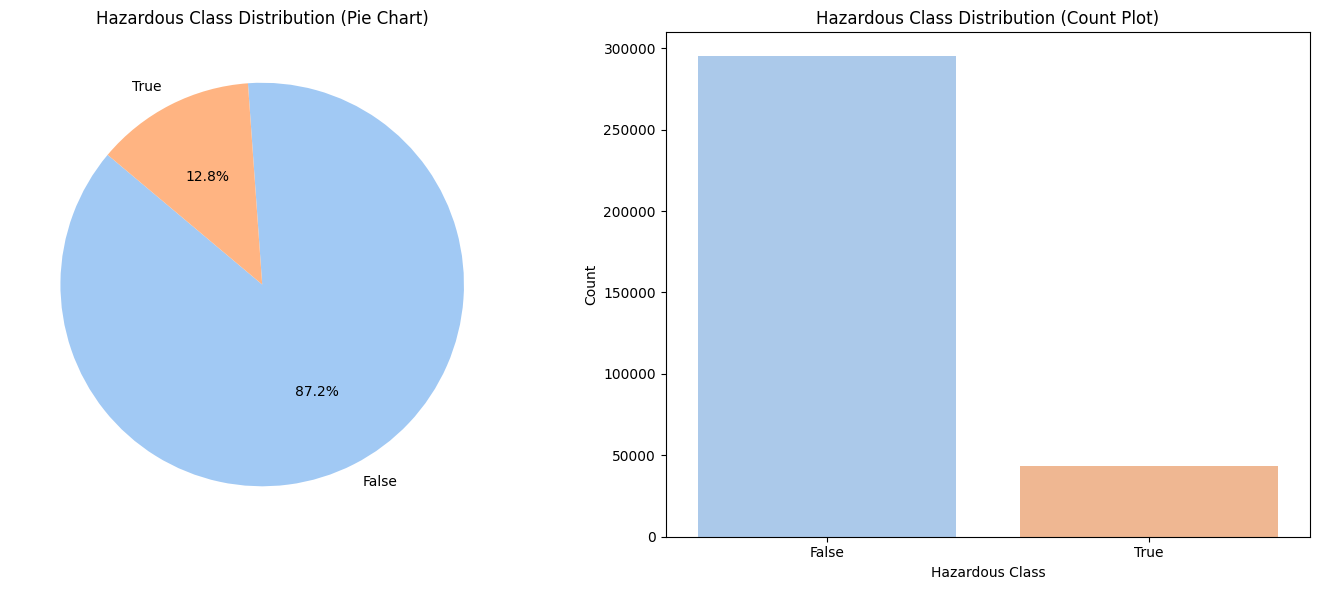

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each value in the 'is_hazardous' column and sort by index
hazardous_counts = neo_data['is_hazardous'].value_counts().sort_index()

# Create a color palette for the pie chart and count plot using a different color scheme
palette = sns.color_palette("pastel", n_colors=len(hazardous_counts))

# Create subplots: one for the pie chart and one for the count plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot a pie chart showing the distribution of hazardous classes
ax1.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Hazardous Class Distribution (Pie Chart)')

# Plot a count plot showing the distribution of hazardous classes
sns.countplot(x='is_hazardous', data=neo_data, ax=ax2, palette=palette)
ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(hazardous_counts.index)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

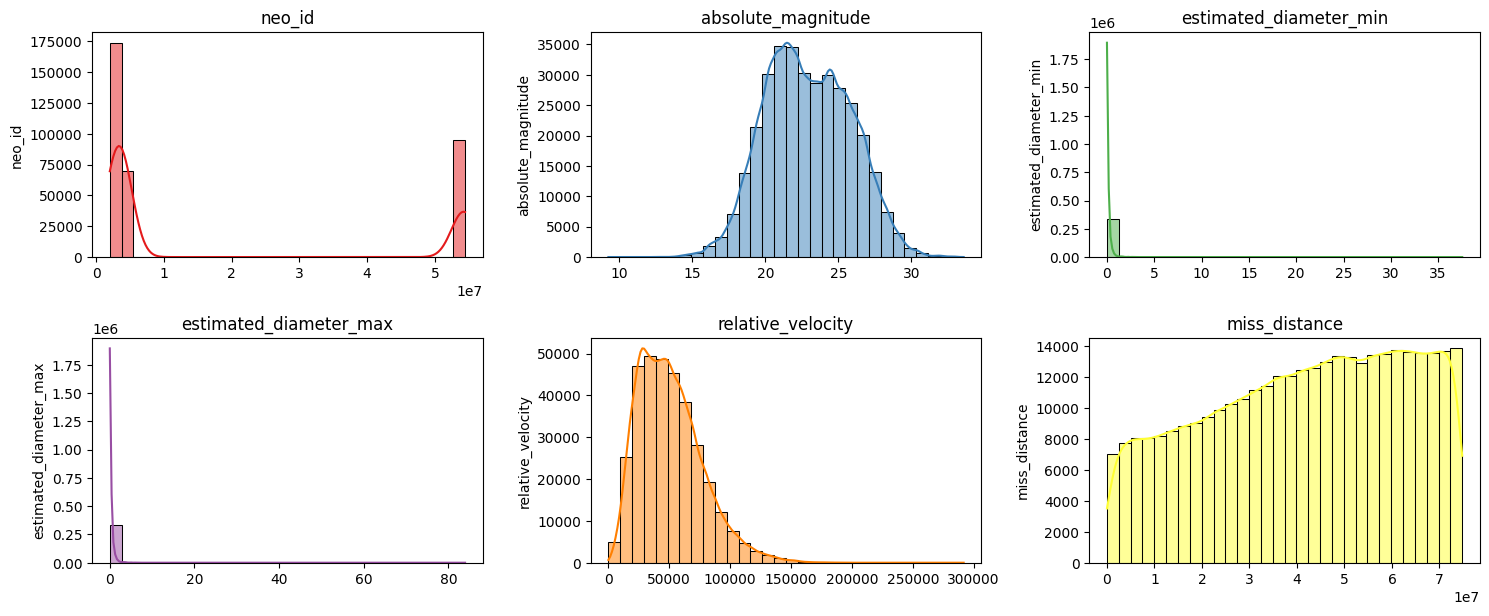

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the grid of histograms
plt.figure(figsize=(15, 15))

# Create a color palette with distinct colors
palette = sns.color_palette("Set1", n_colors=len(neo_data.select_dtypes(include='number').columns))

# Loop through each numerical feature in the DataFrame
for i, feature in enumerate(neo_data.select_dtypes(include='number').columns):
    # Create a subplot for each feature
    plt.subplot(5, 3, i+1)
    # Plot a histogram with a kernel density estimate (KDE) for the current feature
    sns.histplot(data=neo_data, x=feature, bins=30, kde=True, color=palette[i])
    # Set the title of the subplot to the feature name
    plt.title(f'{feature}')
    # Set the x-axis label to an empty string
    plt.xlabel(' ')
    # Set the y-axis label to the feature name
    plt.ylabel(feature)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

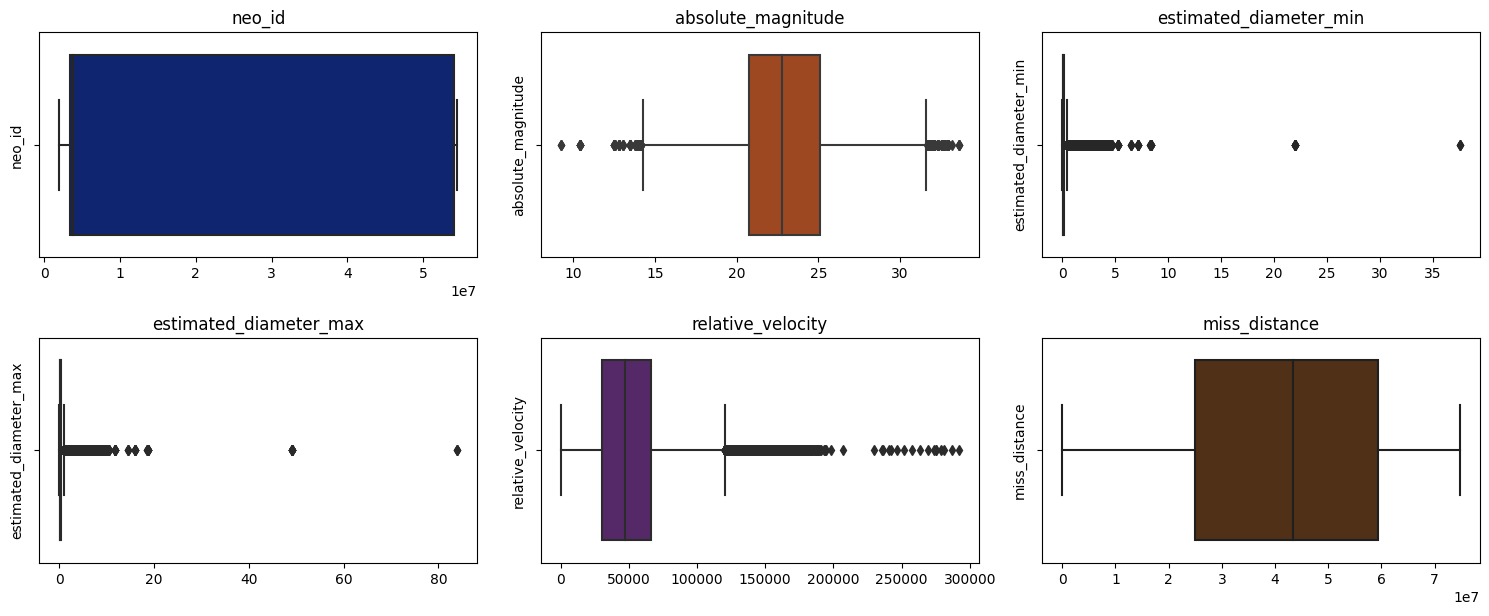

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the grid of box plots
plt.figure(figsize=(15, 15))

# Create a color palette for the box plots using the 'dark' color scheme
palette = sns.color_palette("dark", n_colors=len(neo_data.select_dtypes(include='number').columns))

# Loop through each numerical feature in the DataFrame
for i, feature in enumerate(neo_data.select_dtypes(include='number').columns):
    # Create a subplot for each feature
    plt.subplot(5, 3, i+1)
    # Plot a box plot for the current feature with a specified color
    sns.boxplot(data=neo_data, x=feature, color=palette[i])
    # Set the title of the subplot to the feature name
    plt.title(f'{feature}')
    # Set the x-axis label to an empty string
    plt.xlabel(' ')
    # Set the y-axis label to the feature name
    plt.ylabel(feature)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

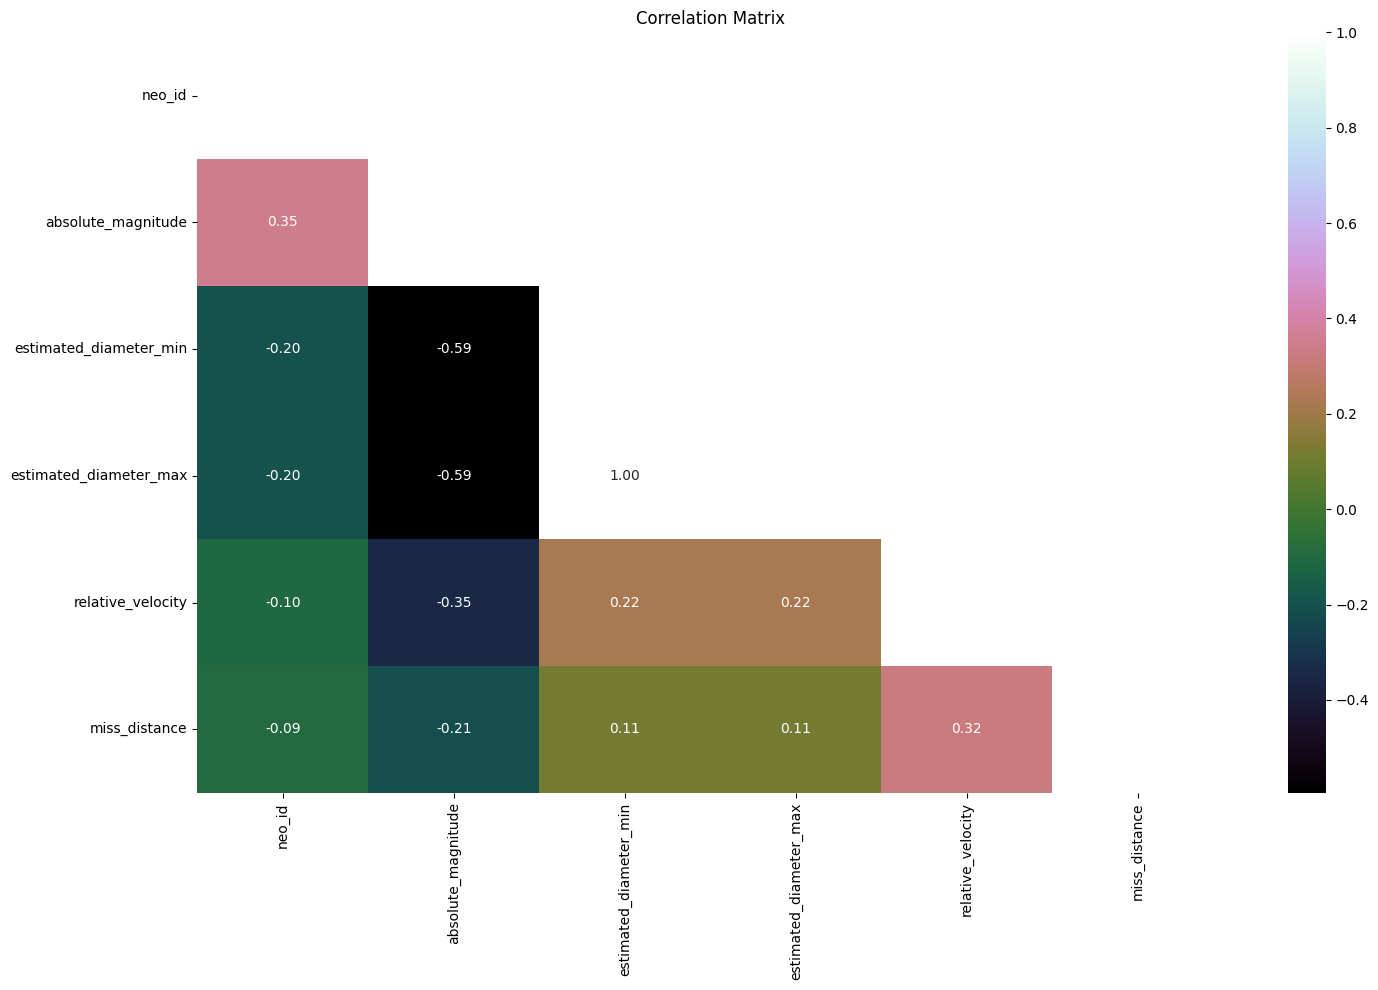

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the correlation matrix for numerical features
corr = neo_data.select_dtypes(include='number').corr()

# Create a mask to display only the upper triangle of the correlation matrix
mask_ut = np.triu(np.ones(corr.shape, dtype=bool))

# Set the figure size for the heatmap
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix with annotations, using the 'cubehelix' color map
sns.heatmap(corr, annot=True, fmt=".2f", cmap="cubehelix", mask=mask_ut)

# Set the title for the heatmap
plt.title("Correlation Matrix")

# Adjust layout to prevent overlap of the plot elements
plt.tight_layout()

# Display the heatmap
plt.show()

In [17]:
# Remove any rows with missing values from the DataFrame
# The 'inplace=True' parameter ensures that the DataFrame is updated directly
neo_data.dropna(inplace=True)

# Display the first 5 rows of the DataFrame after handling missing values

In [19]:
def remove_outliers(feature):
    global df
    # Calculate the first quartile (25th percentile) for the feature
    q1 = df[feature].quantile(0.25)
    # Calculate the third quartile (75th percentile) for the feature
    q3 = df[feature].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    # Define the upper and lower limits for outlier detection
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    # Filter the DataFrame to keep only rows where the feature values are within the limits
    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [20]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")
# Define the function to remove outliers
def remove_outliers(feature):
    global df
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

# List of features to process for outlier removal
features_list = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity"]

# Apply the remove_outliers function to each feature in the list
for feature in features_list:
    remove_outliers(feature)

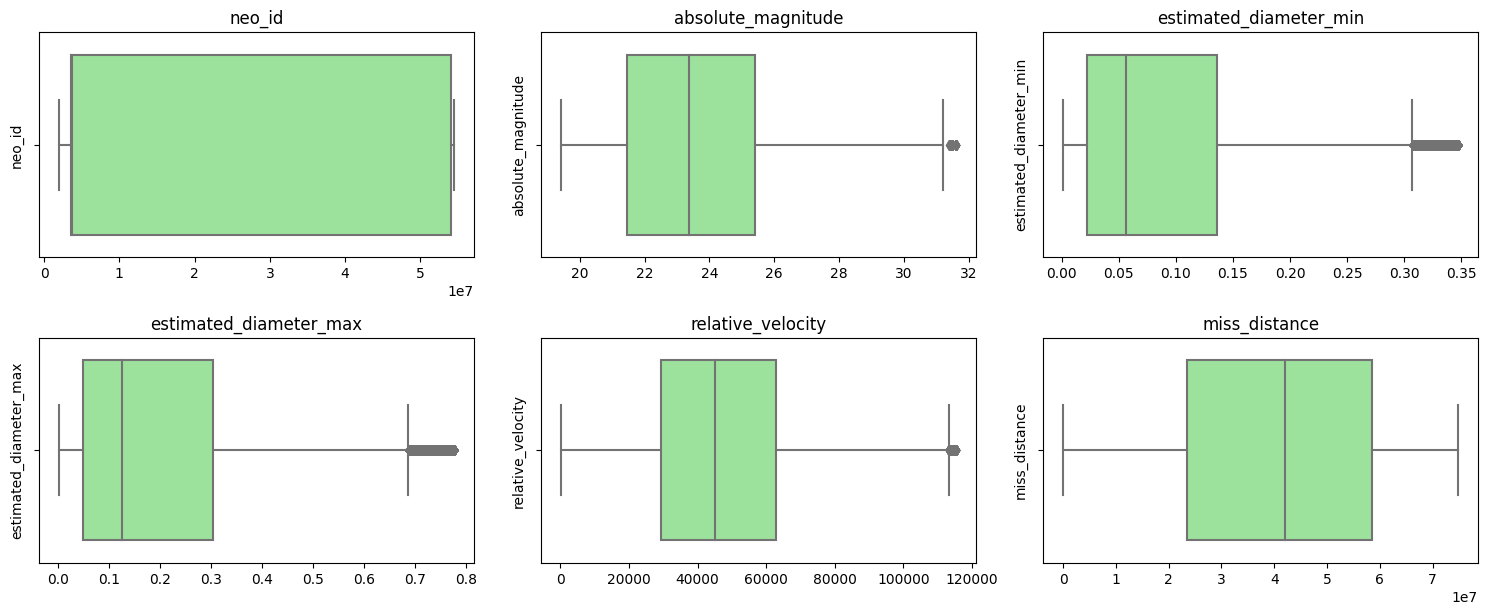

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the grid of box plots
plt.figure(figsize=(15, 15))

# Loop through each numerical feature in the DataFrame
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    # Create a subplot for each feature
    plt.subplot(5, 3, i+1)
    # Plot a box plot for the current feature with a different color
    sns.boxplot(data=df, x=feature, color='lightgreen')
    # Set the title of the subplot to the feature name
    plt.title(f'{feature}')
    # Set the x-axis label to an empty string
    plt.xlabel(' ')
    # Set the y-axis label to the feature name
    plt.ylabel(feature)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the box plots
plt.show()

In [23]:
# Drop columns that are not needed for the model
# 'neo_id', 'name', 'orbiting_body' are identifiers or non-numeric columns, and 'is_hazardous' is the target variable
X = df.drop(["neo_id", "name", "orbiting_body", "is_hazardous"], axis=1)

# Extract the target variable 'is_hazardous' for model training
y = df["is_hazardous"]

In [24]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state for reproducibility
somte = SMOTE(random_state=42)

# Apply SMOTE to the feature matrix X and target vector y
X_resampled, y_resampled = somte.fit_resample(X, y)

# Check the distribution of the target variable after resampling
y_resampled.value_counts()

is_hazardous
False    263579
True     263579
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# stratify=y ensures that the class distribution in y is preserved in both training and testing sets
# test_size=0.2 indicates that 20% of the data will be used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

# Print the shapes of the training and testing sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((236614, 5), (236614,), (59154, 5), (59154,))

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with a fixed random state for reproducibility
model = RandomForestClassifier(random_state=42)

In [27]:
# Train the RandomForestClassifier on the training data
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Train the RandomForestClassifier on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96     52716
        True       0.70      0.60      0.65      6438

    accuracy                           0.93     59154
   macro avg       0.83      0.78      0.80     59154
weighted avg       0.92      0.93      0.93     59154

Confusion Matrix:
[[51090  1626]
 [ 2594  3844]]


In [30]:
from sklearn.metrics import accuracy_score

# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, predictions) * 100

# Print the accuracy
print("Acc is: {:.2f} %".format(accuracy))

Acc is: 92.87 %


In [31]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

[[51090  1626]
 [ 2594  3844]]


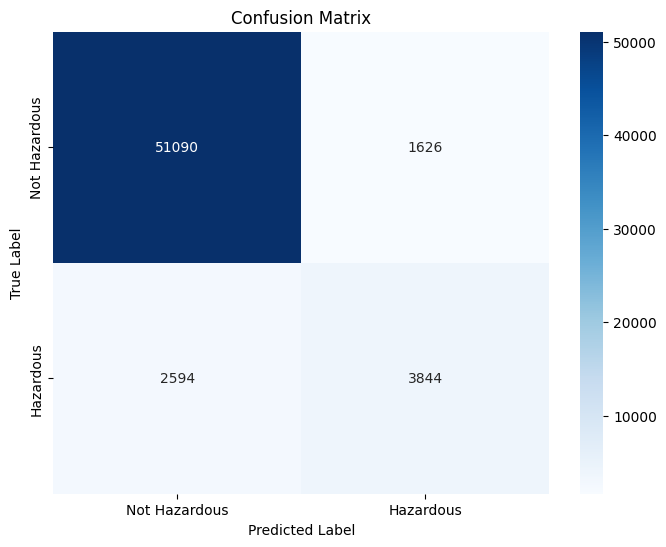

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

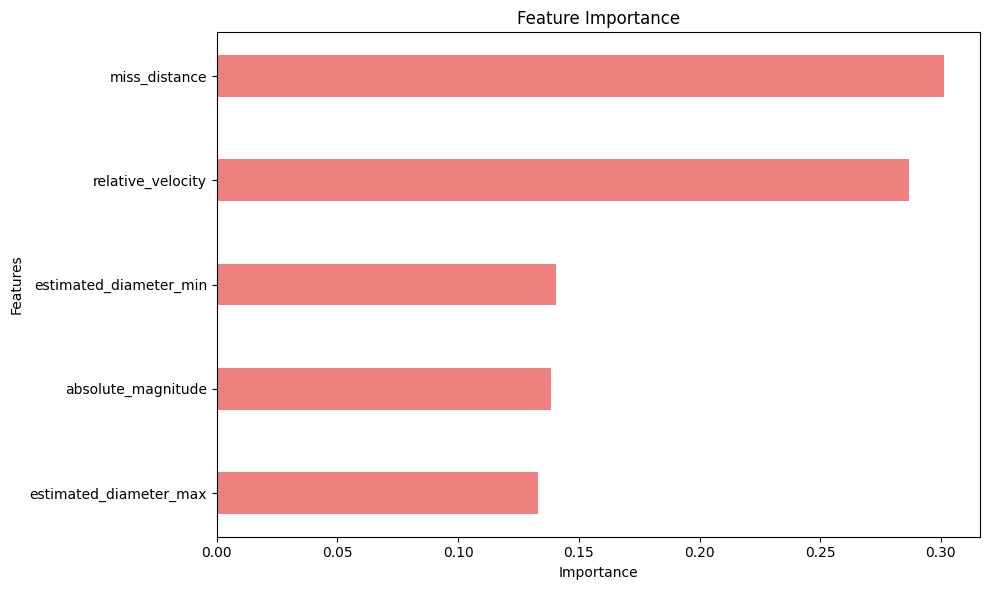

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained classifier
feature_importances = model.feature_importances_

# Get feature names from the training data
feature_names = x_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in ascending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 6))

# Change the color of the bars
ax.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral', height=0.4)

ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

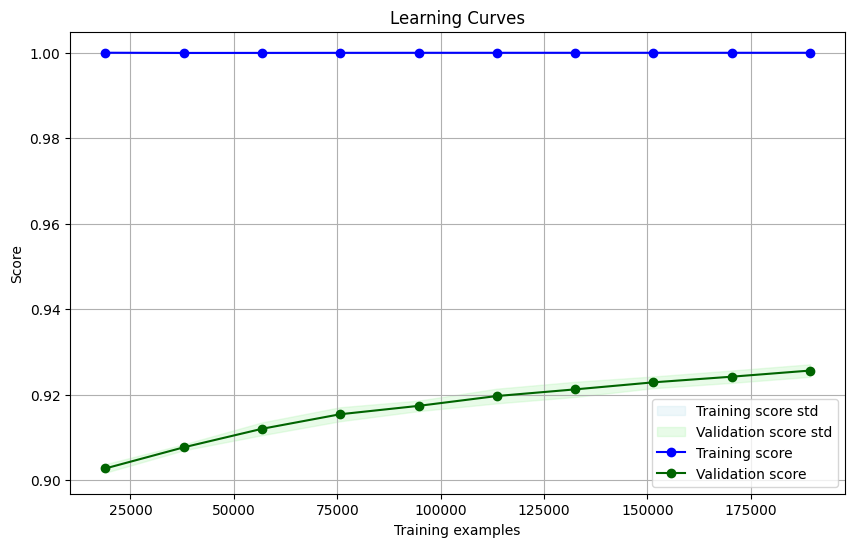

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Compute the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.grid()

# Change the fill colors for training and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="lightblue", label="Training score std")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="lightgreen", label="Validation score std")

# Plot mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="darkgreen", label="Validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()